In [1]:
# Importación de librerias para el notebook
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Importación de las fuentes de datos
base = pd.read_csv('Input/base_de_datos.csv')
correlaciones = pd.read_csv('Input/correlaciones_precios.csv')
correlaciones_cantidad = pd.read_csv('Input/correlaciones_cantidad.csv')

In [3]:
# elimincación de prefijos para cada una de las variables
correlaciones.Producto1 = correlaciones.Producto1.map(lambda x: x.lstrip('precio_'))
correlaciones.Producto2 = correlaciones.Producto2.map(lambda x: x.lstrip('precio_'))
correlaciones_cantidad.Producto1 = correlaciones_cantidad.Producto1.map(lambda x: x.lstrip('cantidad_'))
correlaciones_cantidad.Producto2 = correlaciones_cantidad.Producto2.map(lambda x: x.lstrip('cantidad_'))

In [4]:
# Elimina filas de producto 1 que sean iguales a producto 2
correlaciones_cantidad = correlaciones_cantidad[correlaciones_cantidad.Producto1 != correlaciones_cantidad.Producto2]

In [5]:
correlaciones_cantidad

,Unnamed: 0,Producto1,Producto2,Correlacion
1,1,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-14:49:115:116,-0.039558
2,2,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-157:273:651:652,-0.091036
3,3,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-15:50:117:118,-0.023699
4,4,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-16:51:119:120,0.063767
5,5,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-19:52:121:122,0.090429
...,...,...,...,...
16852,16852,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:139:140,0.050023
16853,16853,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:239:240,0.508780
16854,16854,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:727:728,-0.081695
16855,16855,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-64:86:193:194,0.102866


In [6]:
# Construcción de una tabla con la lista de los productos con mayor valor en ventas
top_5 = pd.pivot_table(base, values="totalVentasConDescuento", index=['sku', 'producto'], aggfunc='sum').reset_index().sort_values('totalVentasConDescuento', ascending=False)
top_5 = list(top_5.sku[0:5])
top_5

['BAQ-FRU1-CAT2-346:464:1180:1181',
 'BAQ-FRU1-CAT6-64:86:193:194',
 'BAQ-FRU1-CAT1-47:67:151:152',
 'BAQ-FRU1-CAT104105-305509:1018259:1018260:563293',
 'BAQ-FRU1-CAT104105-60271:510131:510132:258690']

In [7]:
def strong_correlations(sku, _df1=correlaciones_cantidad, _df2 = correlaciones, top = top_5):
    temp_df1 = _df1[_df1.Producto1==sku]
    temp_df1 = temp_df1[~temp_df1.Producto2.isin(top)]
    temp_df1['abs'] = np.abs(temp_df1.Correlacion)
    temp_df1.sort_values('abs', ascending=False, inplace=True)
    temp_df1["Tipo"] = "Cantidad"
    temp_df1 = temp_df1[['Producto2','Correlacion', 'Tipo']][:10]

    temp_df2 = _df2[_df2.Producto1==sku]
    temp_df2 = temp_df2[~temp_df2.Producto2.isin(top)]
    temp_df2['abs'] = np.abs(temp_df2.Correlacion)
    temp_df2.sort_values('abs', ascending=False, inplace=True)
    temp_df2["Tipo"] = "Precio"
    temp_df2 = temp_df2[['Producto2','Correlacion','Tipo']][:10]

    frames = [temp_df1,temp_df2]
    frames = pd.concat(frames)

    return frames[frames.Producto2.duplicated()==False]

In [8]:
#Observemos por ejemplo las correlaciones en demanda y precio que tienen mayor correlación con el Ñame
strong_correlations('BAQ-FRU1-CAT1-47:67:151:152')

,Producto2,Correlacion,Tipo
3699,BAQ-FRU1-CAT104111-64:1114193:1114194:608238,0.368997,Cantidad
3714,BAQ-FRU1-CAT2-264:351:907:908,0.318400,Cantidad
3742,BAQ-FRU1-CAT4-13460:24519:24520:16230,0.316248,Cantidad
3726,BAQ-FRU1-CAT2-392:624:1608:1609,0.308307,Cantidad
3677,BAQ-FRU1-CAT104105-52857:101263:101262:63782,0.257475,Cantidad
3638,BAQ-FRU1-CAT1-208:432:1113:1114,0.251469,Cantidad
3676,BAQ-FRU1-CAT104105-455150:1153426:1153427:630219,0.228868,Cantidad
3674,BAQ-FRU1-CAT104105-44:643471:643472:327559,0.220314,Cantidad
3752,BAQ-FRU1-CAT6-234:304:750:770,0.214827,Cantidad
3756,BAQ-FRU1-CAT6-43:73:164:863,0.214382,Cantidad


In [9]:
def base_estudio(sku,_df=base):
    base_estudio = _df[_df.sku==sku]
    base_cantidad = pd.pivot_table(base_estudio, values="precio", index=['fecha'], aggfunc='mean').reset_index()
    base_precio = pd.pivot_table(base_estudio, values="cantidad", index=['fecha'], aggfunc='sum').reset_index()
    base_estudio = pd.merge(base_precio, base_cantidad, on='fecha', how='left')

    return base_estudio

def base_consolidada(sku):
    base_x = base_estudio(sku)
    str_corr = list(strong_correlations(sku).Producto2)

    for i in str_corr:
        base_i = base_estudio(i)
        base_i = base_i[['fecha','precio']]
        base_i.rename(columns={'precio':str(i)}, inplace=True)
        base_x = pd.merge(base_x,base_i, on="fecha", how='left')

    base_x.ffill(inplace=True)
    base_x.bfill(inplace=True)

    return base_x

In [10]:
base_prod = base_consolidada('BAQ-FRU1-CAT1-47:67:151:152')

In [11]:
base_prod.dropna()
base_prod

,fecha,cantidad,precio,BAQ-FRU1-CAT104111-64:1114193:1114194:608238,BAQ-FRU1-CAT2-264:351:907:908,BAQ-FRU1-CAT4-13460:24519:24520:16230,BAQ-FRU1-CAT2-392:624:1608:1609,BAQ-FRU1-CAT104105-52857:101263:101262:63782,BAQ-FRU1-CAT1-208:432:1113:1114,BAQ-FRU1-CAT104105-455150:1153426:1153427:630219,...,BAQ-FRU1-CAT6-283:371:966:967,BAQ-FRU1-CAT104111-455605:1155679:1155680:631333,BAQ-FRU1-CAT2-281:370:964:965,BAQ-FRU1-CAT1-52:78:177:178,BAQ-FRU1-CAT104107-456426:1155955:1155956:631850,BAQ-FRU1-CAT104107-455147:1153424:1153423:630218,BAQ-FRU1-CAT1-4:44:104:105,BAQ-FRU1-CAT104105-455075:1153677:1153676:630613,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:139:140
0,2022-07-30,240,2877.000000,4080.0,10000.0,5050.000000,4013.157895,6710.0,7160.0,3308.000000,...,2600.0,5800.0,4310.0,12699.0,7150.0,5580.0,2499.0,2500.000000,7790.0,4420.0
1,2022-08-01,111,3372.428571,4080.0,10000.0,5050.000000,4000.000000,6710.0,6920.0,3308.000000,...,2600.0,5800.0,4310.0,12699.0,7150.0,5580.0,2601.0,2500.000000,7790.0,4335.0
2,2022-08-02,231,3129.875000,4080.0,10000.0,5176.000000,3990.000000,6710.0,7350.0,3308.000000,...,2600.0,5800.0,4310.0,12694.0,7150.0,5580.0,2601.0,2500.000000,7950.0,4332.5
3,2022-08-03,387,2877.000000,4080.0,10000.0,5260.000000,3596.666667,4460.0,8730.0,3308.000000,...,2600.0,5800.0,4310.0,12689.0,7150.0,5580.0,2999.0,2500.000000,7830.0,4325.0
4,2022-08-04,450,2852.941176,4080.0,10000.0,5073.333333,3229.259259,3560.0,8730.0,3308.000000,...,2600.0,5800.0,4310.0,13811.0,7150.0,5580.0,2999.0,2500.000000,7806.0,3844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-06-27,114,5061.147692,3800.0,10000.0,7700.000000,4070.000000,8660.0,8620.0,3684.117647,...,4500.0,4500.0,3040.0,15100.0,6730.0,6164.1,3310.0,2811.818182,9950.0,6825.0
276,2023-06-28,96,5075.994545,3800.0,10000.0,7700.000000,4070.000000,8660.0,8620.0,3705.000000,...,4500.0,4500.0,3040.0,15100.0,6730.0,6164.1,3230.0,2779.285714,9950.0,6825.0
277,2023-06-29,270,5117.268667,3800.0,10000.0,7700.000000,4070.000000,8660.0,8620.0,3703.888889,...,4500.0,4500.0,3040.0,15100.0,6639.0,6164.1,3230.0,2638.666667,9950.0,6825.0
278,2023-06-30,222,5097.440000,4720.0,10000.0,7700.000000,4070.000000,8660.0,8620.0,3600.434783,...,4500.0,4500.0,3320.0,15100.0,6626.0,6164.1,3230.0,2440.344828,9950.0,6825.0


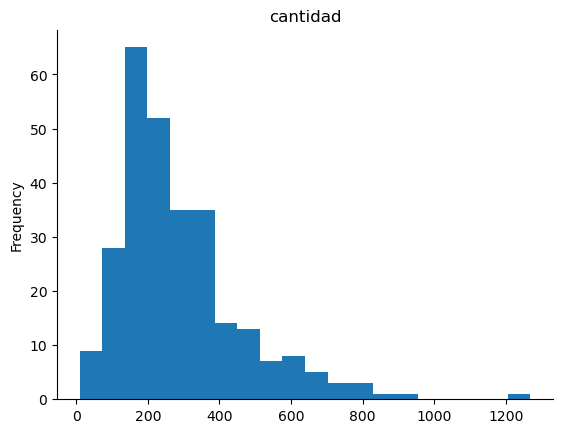

In [12]:
# Distribución de la variable objetivo (Cantidad)
from matplotlib import pyplot as plt
base_prod['cantidad'].plot(kind='hist', bins=20, title='cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<AxesSubplot:xlabel='fecha', ylabel='cantidad'>

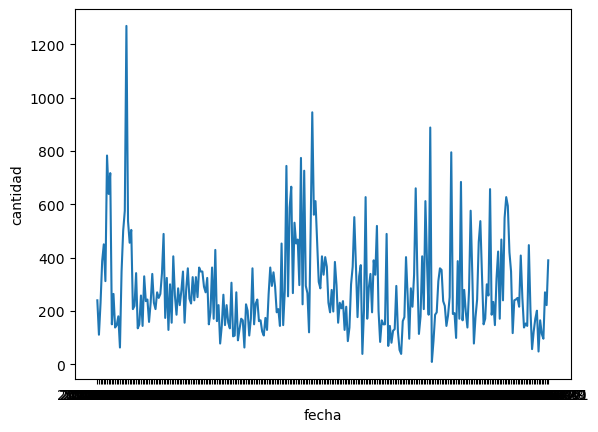

In [13]:
# Comportamiento de las cantidades vendidas durante el tiempo
sns.lineplot(data=base_prod, x="fecha", y="cantidad")

In [14]:
# correlaciones de la variable objetivo vs las demas variables de la tabla base
corr_name = base_prod.drop(columns="fecha").corr()
corr_name.cantidad

cantidad                                            1.000000
precio                                             -0.130197
BAQ-FRU1-CAT104111-64:1114193:1114194:608238        0.096380
BAQ-FRU1-CAT2-264:351:907:908                            NaN
BAQ-FRU1-CAT4-13460:24519:24520:16230              -0.031208
BAQ-FRU1-CAT2-392:624:1608:1609                     0.006867
BAQ-FRU1-CAT104105-52857:101263:101262:63782       -0.011171
BAQ-FRU1-CAT1-208:432:1113:1114                    -0.091556
BAQ-FRU1-CAT104105-455150:1153426:1153427:630219    0.090671
BAQ-FRU1-CAT104105-44:643471:643472:327559         -0.027467
BAQ-FRU1-CAT6-234:304:750:770                       0.018315
BAQ-FRU1-CAT6-43:73:164:863                         0.063046
BAQ-FRU1-CAT6-283:371:966:967                      -0.138177
BAQ-FRU1-CAT104111-455605:1155679:1155680:631333    0.124157
BAQ-FRU1-CAT2-281:370:964:965                       0.077763
BAQ-FRU1-CAT1-52:78:177:178                        -0.043716
BAQ-FRU1-CAT104107-45642

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xdf = base_prod.drop(columns=['fecha', 'cantidad','BAQ-FRU1-CAT2-392:624:1608:1609',
                              'BAQ-FRU1-CAT104105-52857:101263:101262:63782','BAQ-FRU1-CAT104107-455147:1153424:1153423:630218',
                             'BAQ-FRU1-CAT6-46:61:139:140','BAQ-FRU1-CAT6-43:73:164:863','BAQ-FRU1-CAT6-82:276:657:658',
                             'BAQ-FRU1-CAT1-52:78:177:178','BAQ-FRU1-CAT104111-455605:1155679:1155680:631333',
                             'BAQ-FRU1-CAT104105-455075:1153677:1153676:630613','BAQ-FRU1-CAT104111-64:1114193:1114194:608238'])

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = Xdf.columns
vif_data["VIF"] = [variance_inflation_factor(Xdf.values, i) for i in range(len(Xdf.columns))]

vif_data

,Variable,VIF
0,precio,5.369177
1,BAQ-FRU1-CAT2-264:351:907:908,35466.080356
2,BAQ-FRU1-CAT4-13460:24519:24520:16230,3.412677
3,BAQ-FRU1-CAT1-208:432:1113:1114,1.673013
4,BAQ-FRU1-CAT104105-455150:1153426:1153427:630219,3.872787
5,BAQ-FRU1-CAT104105-44:643471:643472:327559,2.327754
6,BAQ-FRU1-CAT6-234:304:750:770,3.317085
7,BAQ-FRU1-CAT6-283:371:966:967,10.579958
8,BAQ-FRU1-CAT2-281:370:964:965,13.864945
9,BAQ-FRU1-CAT104107-456426:1155955:1155956:631850,3.905166


In [16]:
# Listas de variables con un VIF inferior al 10
var_sel = list(vif_data.Variable[vif_data.VIF < 10])

In [17]:
var_sel

['precio',
 'BAQ-FRU1-CAT4-13460:24519:24520:16230',
 'BAQ-FRU1-CAT1-208:432:1113:1114',
 'BAQ-FRU1-CAT104105-455150:1153426:1153427:630219',
 'BAQ-FRU1-CAT104105-44:643471:643472:327559',
 'BAQ-FRU1-CAT6-234:304:750:770',
 'BAQ-FRU1-CAT104107-456426:1155955:1155956:631850',
 'BAQ-FRU1-CAT1-4:44:104:105']

In [18]:
#Definición de roles para el modelo
X = base_prod[var_sel].to_numpy()
y = base_prod.cantidad.to_numpy()

In [19]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (280, 8)
Shape of y: (280,)


# Modelado

Modelo para el producto

* 'BAQ-FRU1-CAT2-346:464:1180:1181'
* 'BAQ-FRU1-CAT6-64:86:193:194'
* **'BAQ-FRU1-CAT1-47:67:151:152' (Plátano Verde Estándar Mediano Estandar Verde)**
* 'BAQ-FRU1-CAT104105-305509:1018259:1018260:563293'
* 'BAQ-FRU1-CAT104105-60271:510131:510132:258690'


Se aplica el modelo LR stats

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Definir el número de folds para la validación cruzada
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada fold
mse_list = []
r2_list = []

# Realizar la validación cruzada
for train_index, test_index in kf.split(X):#_train):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Verificar las dimensiones antes de ajustar el modelo
    print("Shape of X_train_fold:", X_train_fold.shape)
    print("Shape of y_train_fold:", y_train_fold.shape)
    print("Shape of X_val_fold:", X_val_fold.shape)
    print("Shape of y_val_fold:", y_val_fold.shape)    

    # Ajustar el modelo en el fold de entrenamiento
    model = sm.OLS(y_train_fold, sm.add_constant(X_train_fold)).fit()

    # Realizar predicciones en el fold de validación
    y_pred_fold = model.predict(sm.add_constant(X_val_fold))

    # Calcular MSE y R2 en el fold de validación
    mse_fold = np.mean((y_pred_fold - y_val_fold)**2)
    r2_fold = model.rsquared

    # Almacenar los resultados
    mse_list.append(mse_fold)
    r2_list.append(r2_fold)

# Calcular el promedio de MSE y R2
summary = model.summary()
mse_6 = np.mean(mse_list)
r2_6 = np.mean(r2_list)

print(summary)
print("MSE promedio en validación cruzada:", mse_6)
print("R2 promedio en validación cruzada:", r2_6)


Shape of X_train_fold: (224, 8)
Shape of y_train_fold: (224,)
Shape of X_val_fold: (56, 8)
Shape of y_val_fold: (56,)
Shape of X_train_fold: (224, 8)
Shape of y_train_fold: (224,)
Shape of X_val_fold: (56, 8)
Shape of y_val_fold: (56,)
Shape of X_train_fold: (224, 8)
Shape of y_train_fold: (224,)
Shape of X_val_fold: (56, 8)
Shape of y_val_fold: (56,)
Shape of X_train_fold: (224, 8)
Shape of y_train_fold: (224,)
Shape of X_val_fold: (56, 8)
Shape of y_val_fold: (56,)
Shape of X_train_fold: (224, 8)
Shape of y_train_fold: (224,)
Shape of X_val_fold: (56, 8)
Shape of y_val_fold: (56,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5.168
Date:                Sun, 26 May 2024   Prob (F-statistic):           6.53e-06
Time:          

In [21]:
pronostico = model.predict(sm.add_constant(X))

(array([ 2.,  2.,  0.,  1.,  1.,  1.,  1.,  4.,  6., 12., 17., 14., 27.,
        23., 22., 20., 18., 32., 23., 24., 13.,  6.,  4.,  1.,  1.,  1.,
         0.,  0.,  2.,  2.]),
 array([ 34.39838288,  50.69151119,  66.98463951,  83.27776782,
         99.57089614, 115.86402446, 132.15715277, 148.45028109,
        164.7434094 , 181.03653772, 197.32966604, 213.62279435,
        229.91592267, 246.20905098, 262.5021793 , 278.79530762,
        295.08843593, 311.38156425, 327.67469256, 343.96782088,
        360.2609492 , 376.55407751, 392.84720583, 409.14033415,
        425.43346246, 441.72659078, 458.01971909, 474.31284741,
        490.60597573, 506.89910404, 523.19223236]),
 <BarContainer object of 30 artists>)

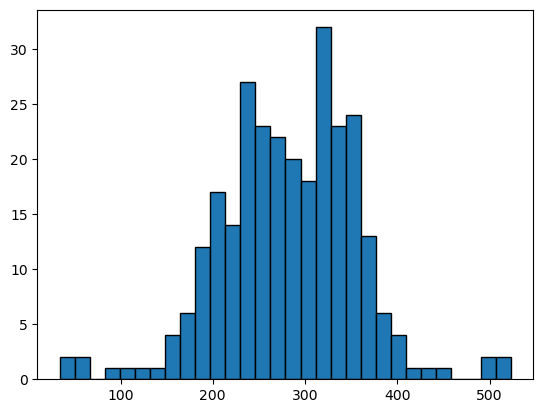

In [22]:
#pronostico.hist()
plt.hist(pronostico, bins=30, edgecolor='black')
#pronostico.plot(kind='hist', bins=20, title='cantidad')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
pronostico.shape

(280,)

In [24]:
print(pronostico)

[362.58810421 319.649563   341.0615452  373.6807095  360.69798422
 402.86315299 443.38090467 402.49996031 358.17956422 253.04549805
 228.31843303 248.92408626 263.24621988 245.99247274 252.86217644
 501.31973812 523.19223236 493.80103787 510.87081325 404.46759222
 240.77046564 204.09222784 291.2966085  299.64472059 233.38550513
 217.55470097 213.0230947  236.97135568 240.69182875 242.9716938
 254.91116511 248.62727415 236.9466413  248.59800169 239.6201782
 249.23913848 240.81345445 240.81345445 241.63393832 215.68613491
 178.8902353  253.62441438 303.5623047  316.35809513 311.81422607
 313.04863053 326.54843968 375.33194817 375.06943849 357.24846739
 367.00665457 380.00487981 378.01874032 379.57896944 320.61976452
 327.27877035 297.59408409 288.84318409 288.84318409 316.48333174
 307.6706937  334.43985944 331.70315423 340.63528349 321.38934333
 316.797674   319.14235715 316.797674   322.38025479 322.38025479
 322.38025479 322.38025479 305.04634718 234.68369994 230.66145868
 228.897752 

# Guardado del modelo elegido

In [25]:
import pickle
# Guardar el modelo en pickle
with open('../Modelo de Optimizacion/Input/platano_verde.pkl','wb')as f:
    pickle.dump(model ,f)
print("Modelo guardado en 'platano_verde.pkl'")

Modelo guardado en 'platano_verde.pkl'


In [26]:
# Cargar el modelo guardado desde el archivo
with open('../Modelo de Optimizacion/Input/platano_verde.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)

# Verificar que el modelo cargado funcione correctamente
print("Parámetros del modelo cargado:", modelo_cargado.params)
print("Resumen del modelo cargado:\n", modelo_cargado.summary())

Parámetros del modelo cargado: [-6.10030739e+03 -1.25608026e-01  8.37852128e-02 -3.42088152e-02
  1.73063123e-01  9.77602238e-02  7.44234287e-02  7.61186368e-01
  1.09462368e-01]
Resumen del modelo cargado:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5.168
Date:                Sun, 26 May 2024   Prob (F-statistic):           6.53e-06
Time:                        18:59:24   Log-Likelihood:                -1455.6
No. Observations:                 224   AIC:                             2929.
Df Residuals:                     215   BIC:                             2960.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
  

In [27]:
producto = 'BAQ-FRU1-CAT1-47:67:151:152'
var_exportar = var_sel
var_exportar[0] = producto
var_exportar_df = pd.DataFrame()
var_exportar_df['sku'] = var_exportar
var_exportar_df['producto'] = producto
var_exportar_df.to_csv('../Modelo de Optimizacion/Input/Variables/Variables_platano.csv')